In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img(img, size=4, hlines=[]):
    plt.figure(figsize=(size, size))
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    for hline in hlines:
        ax.axhline(y=hline, color='red', linewidth=2)
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [3]:
def display_line(data, size=4, ylim=None, hlines=[], vlines=[]):
    plt.figure(figsize=(size, size))
    fig, ax = plt.subplots()
    ax.plot(range(len(data)), data)
    plt.ylim(bottom=0)
    if not (ylim is None):
        plt.ylim(top=ylim)
    for hline in hlines:
        ax.axhline(y=hline)
    for vline in vlines:
        ax.axvline(x=vline, color='red', linewidth=2)
    plt.show()

In [4]:
filepath = "plant_cropped.jpg"

<Figure size 400x400 with 0 Axes>

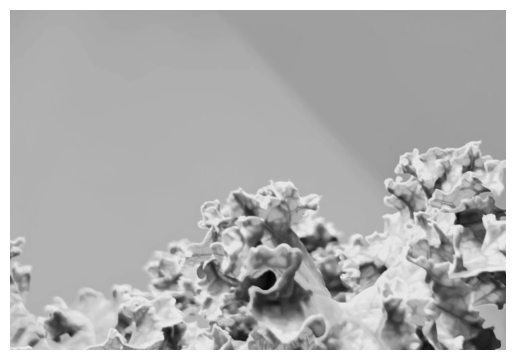

In [5]:
def read_img(filepath):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception("reading image failed")
    else:
        return img

raw_img = read_img(filepath)
display_img(raw_img)

<Figure size 400x400 with 0 Axes>

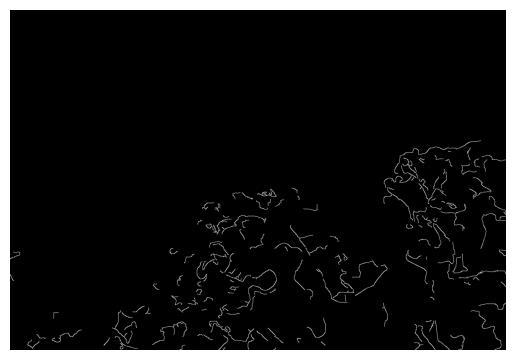

In [6]:
def detect_edges(img):
    return cv.Canny(img, 100, 200)

edge_img = detect_edges(raw_img)
display_img(edge_img)

<Figure size 400x400 with 0 Axes>

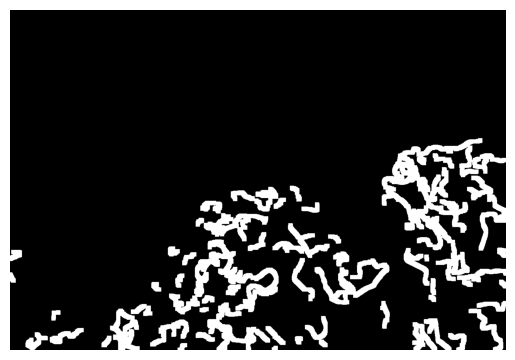

In [7]:
def dilate_img(img):
    return cv.dilate(img, kernel=np.ones((11, 11)), iterations=1)

dilated = dilate_img(edge_img)
display_img(dilated)

<Figure size 400x400 with 0 Axes>

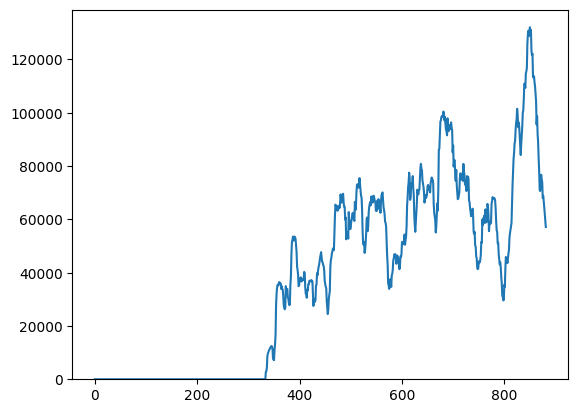

In [8]:
def calc_var_over_rows(img):
    return np.sum(img, axis=-1)

variation_over_rows = calc_var_over_rows(dilated)
display_line(variation_over_rows)

<Figure size 400x400 with 0 Axes>

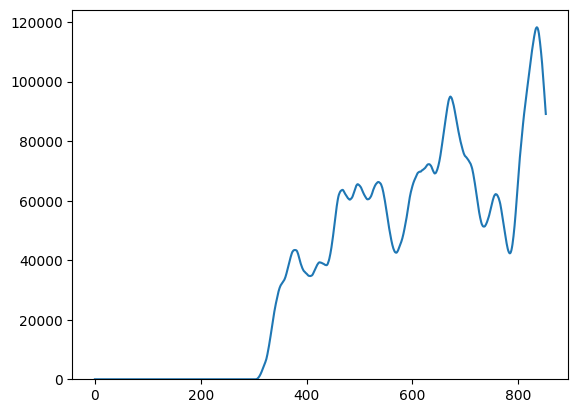

In [9]:
def gaussian_filter(kernel_size, sigma):
    kernel = np.fromfunction(
        lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - (kernel_size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (kernel_size,)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel to ensure the sum is 1
kernel = gaussian_filter(30, 10)
def smooth_data(data):
    return np.convolve(data, kernel, mode='valid')

smoothed_data = smooth_data(variation_over_rows)
display_line(smoothed_data)

In [10]:
def calc_splitter(data, threshold=10000):
    # maxI, maxV = None, float('-inf')
    # for i in range(1, len(data)):
    #     mean_before = np.mean(data[0:i])
    #     mean_after = np.mean(data[i:])
    #     difference = mean_after - mean_before
    #     if difference > maxV:
    #         maxI, maxV = i, difference
    # return maxI

    for i, v in enumerate(data):
        if v > threshold:
            return i
    return None

splitter = calc_splitter(smoothed_data)
print(splitter)

328


# Putting it all together:

In [11]:
def put_it_all_together(filepath):
    print(filepath)

    raw_img = read_img(filepath)
    edge_img = detect_edges(raw_img)
    dilated = dilate_img(edge_img)
    variation_over_rows = calc_var_over_rows(dilated)
    smoothed_data = smooth_data(variation_over_rows)
    splitter = calc_splitter(smoothed_data, 20000)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.imshow(raw_img, cmap='gray')
    ax1.axhline(y=splitter, color='red', linestyle='--')
    ax2.plot(range(len(smoothed_data)), smoothed_data)
    ax2.axvline(x=splitter, color='red', linestyle='--')
    ax2.set_xlabel('Pixel Row')
    ax2.set_ylabel('Edge Amount')
    plt.tight_layout()
    plt.show()

plant_cropped.jpg


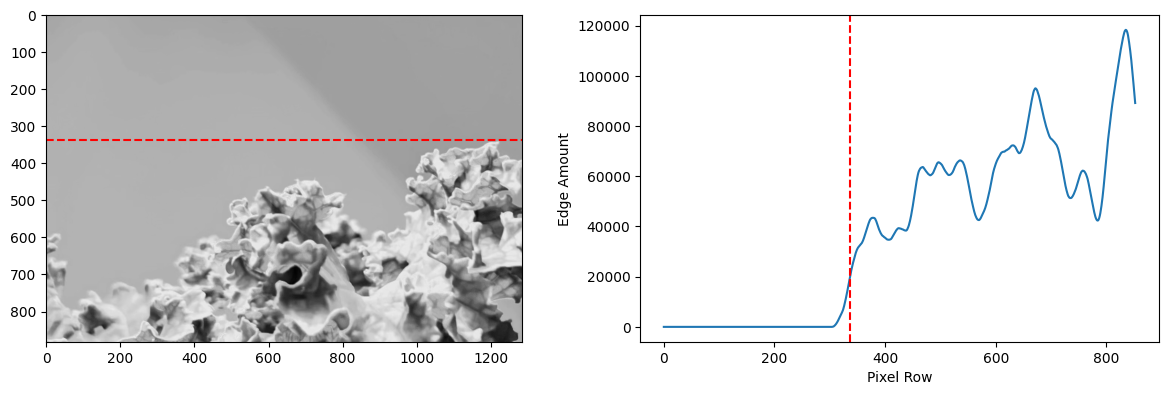

In [12]:
put_it_all_together("plant_cropped.jpg")